## La tordeuse des bourgeons de l’épinette  

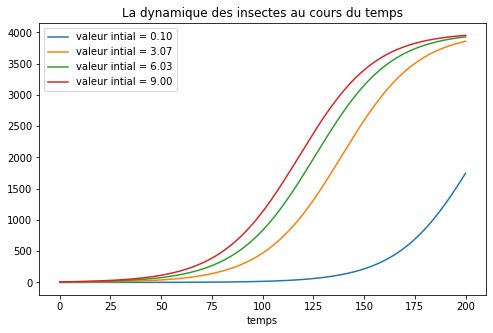

In [44]:
# Dessiner la dynamique temporel
import numpy as np
import matplotlib.pyplot as plt


dt = 0.1

P = 0.05 
r = 0.53
beta = 10
#N=20
landa=0.01
S=15
Nc=landa*S
kp=4
K=kp*S
#dNdt=r*N*(1-N/K)-(beta*P*N**2/(N**2+Nc**2))

landa=0.1
S=1000
kp=4
Nc=landa*S
K=kp*S

#r = 0.53   # taux de croissance
#K = 10.    # capacité de transport

#plot
fig = plt.figure(figsize=(8,5))
plt.subplot(1,1,1)

for j in np.linspace(0.1, 9, 4):
    N = [j]
    #Calcul
    for i in range(200):
        N.append( N[i]+(r * N[i] * (1 - N[i]/K) - (beta*P * N[i]**2)/(Nc**2 + N[i]**2))*dt )
        
    plt.plot(N, label = 'valeur intial = %0.2f' %j)

plt.title("La dynamique des insectes au cours du temps")
plt.xlabel("temps")
plt.legend(loc = 'best')

*On  constate que l'évolution dépend de la valeur initial 

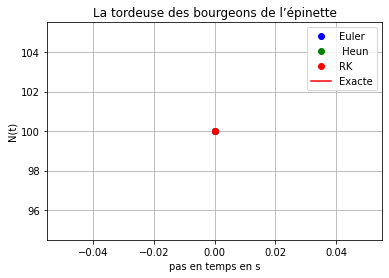

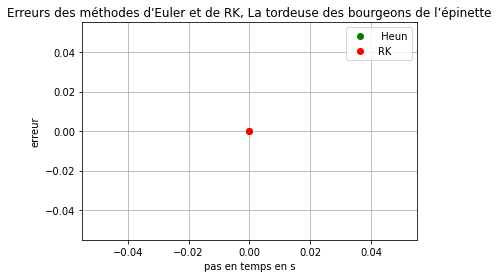

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,fabs,sin,cos,sqrt
#Pour obtenir des differents cas il suffit de changer les parametres
P = 10 
r = 0,1
beta = 20
#N=20
landa=0.5
S=1000
Nc=landa*S
kp=4
K=kp*S
#dNdt=r*N*(1-N/K)-(beta*P*N**2/(N**2+Nc**2))

landa=0.5
S=1000
kp=4
Nc=landa*S
K=kp*S
def tord(t,s,r,P,beta,Nc,K):
    #dNdt=s[1]
    #dvdt=-p[0]*s[0]/p[1]
    dNdt=r*s[0]*(1-s[0]/K)-(P*beta*s[0]**2)/(s[0]**2+Nc**2)
    return [dNdt]



def Euler(tn,h,Nt,r,P,beta,Nc,K):
    dN=tord(tn,Nt,r,P,beta,Nc,K)
    N=Nt+h*dN
    return [N]
    #v=vn+h*dv
# print(tn,dx,dv,x,v)

def Heun(tn,h,Nt,r,P,beta,Nc,K):
    dN1=tord(tn,Nt,r,P,beta,Nc,K)
    dN2=tord(tn+h,Nt+h*dN1,r,P,beta,Nc,K)  
    N = Nt + h*(dN1 + dN2)/2
    return [N]
    #v = vn + h*(dv1 + dv2)/2
#    print(tn,dx1,dv1,dx2,dv2,x,v)
def RK4(tn,h,Nt,r,P,beta,Nc,K):
    k1N=tord(tn,Nt,r,P,beta,Nc,K)
    k2N=tord(tn+h/2,Nt+h*k1N/2,r,P,beta,Nc,K)
    k3N=tord(tn+h/2,Nt+h*k2N/2,r,P,beta,Nc,K)
    k4N=tord(tn+h,Nt+h*k3N,r,P,beta,Nc,K)
    N=Nt+h*(k1N+2*k2N+2*k3N+k4N)/6
    return [N]


# Fin des déclarations de fonctions
# Programme principal: simulation de l'oscillateur harmonique
h=0.1
#Nt

P = 10 
r = 0,1
beta = 20
landa=0.5
S=1000
Nc=landa*S
kp=4
K=kp*S

#N1= 200
#k=1
#m=1
#w0=sqrt(k/m)
N0=100
CI=[N0]

#solution approchée
t=[0]
sol_Euler=[CI]
sol_Heun=[CI]
sol_RK=[CI]

Nt=CI
sol_Exacte=[N0]  #solution exacte
Pas_en_temps=[]

for i in range(1,len(Nt)):
    tn=i*h
    t.append(tn)
    Nt=Euler(tn,h,Nt,r,P,beta,Nc,K)
    sol_Euler.append([Nt])
Nt=CI    
for i in range(1,len(Nt)):
    tn=i*h
    Nn=Heun(tn,h,Nt,r,P,beta,Nc,K)
    sol_Heun.append([Nt])
Nt=CI
for i in range(1,len(Nt)):
    tn=i*h
    Nn=RK4(tn,h,Nt,r,P,beta,Nc,K)
    sol_RK.append([Nt])
for i in range(1,len(Nt)):
    tn=i*h
    sol_Exacte.append(N0*K*beta*P*t/Nc**2)
    #la solution est obtenue avec un logiciel qui résout  les E.D non linéaires

#%%
x_Euler=[]
x_Heun=[]
x_RK=[]

for i in range(0,len(Nt)):
    x_Euler.append(sol_Euler[i][0])
    x_Heun.append(sol_Heun[i][0])
    x_RK.append(sol_RK[i][0])
    
plt.plot(t,x_Euler,'bo',label='Euler')
plt.plot(t,x_Heun,'go',label=' Heun')
plt.plot(t,x_RK,'ro',label='RK')
plt.plot(t,sol_Exacte,'r',label='Exacte')

plt.grid(which='major',axis='both')
plt.legend()
plt.title("La tordeuse des bourgeons de l’épinette")
plt.xlabel(" temps  ")
plt.ylabel("N(t)")
plt.show()
#%% Si l'on représente plutôt l'erreur entre les diffrentes
# méthodes et la solution exacte
erreur_Euler=[]
erreur_Heun=[]
erreur_RK=[]

for i in range(0,len(Nt)):
    erreur_Euler.append(fabs(sol_Euler[i][0]-sol_Exacte[i]))
    erreur_Heun.append(fabs(sol_Heun[i][0]-sol_Exacte[i]))
    erreur_RK.append(fabs(sol_RK[i][0]-sol_Exacte[i]))
#plt.plot(t,erreur_Euler,'bo',label='Euler')
plt.plot(t,erreur_Heun,'go',label=' Heun')
plt.plot(t,erreur_RK,'ro',label='RK')

plt.grid(which='major',axis='both')
plt.legend()
plt.title("Erreurs des méthodes d'Euler et de RK, La tordeuse des bourgeons de l’épinette")
plt.xlabel(" temps ")
plt.ylabel("erreur")
plt.show() 

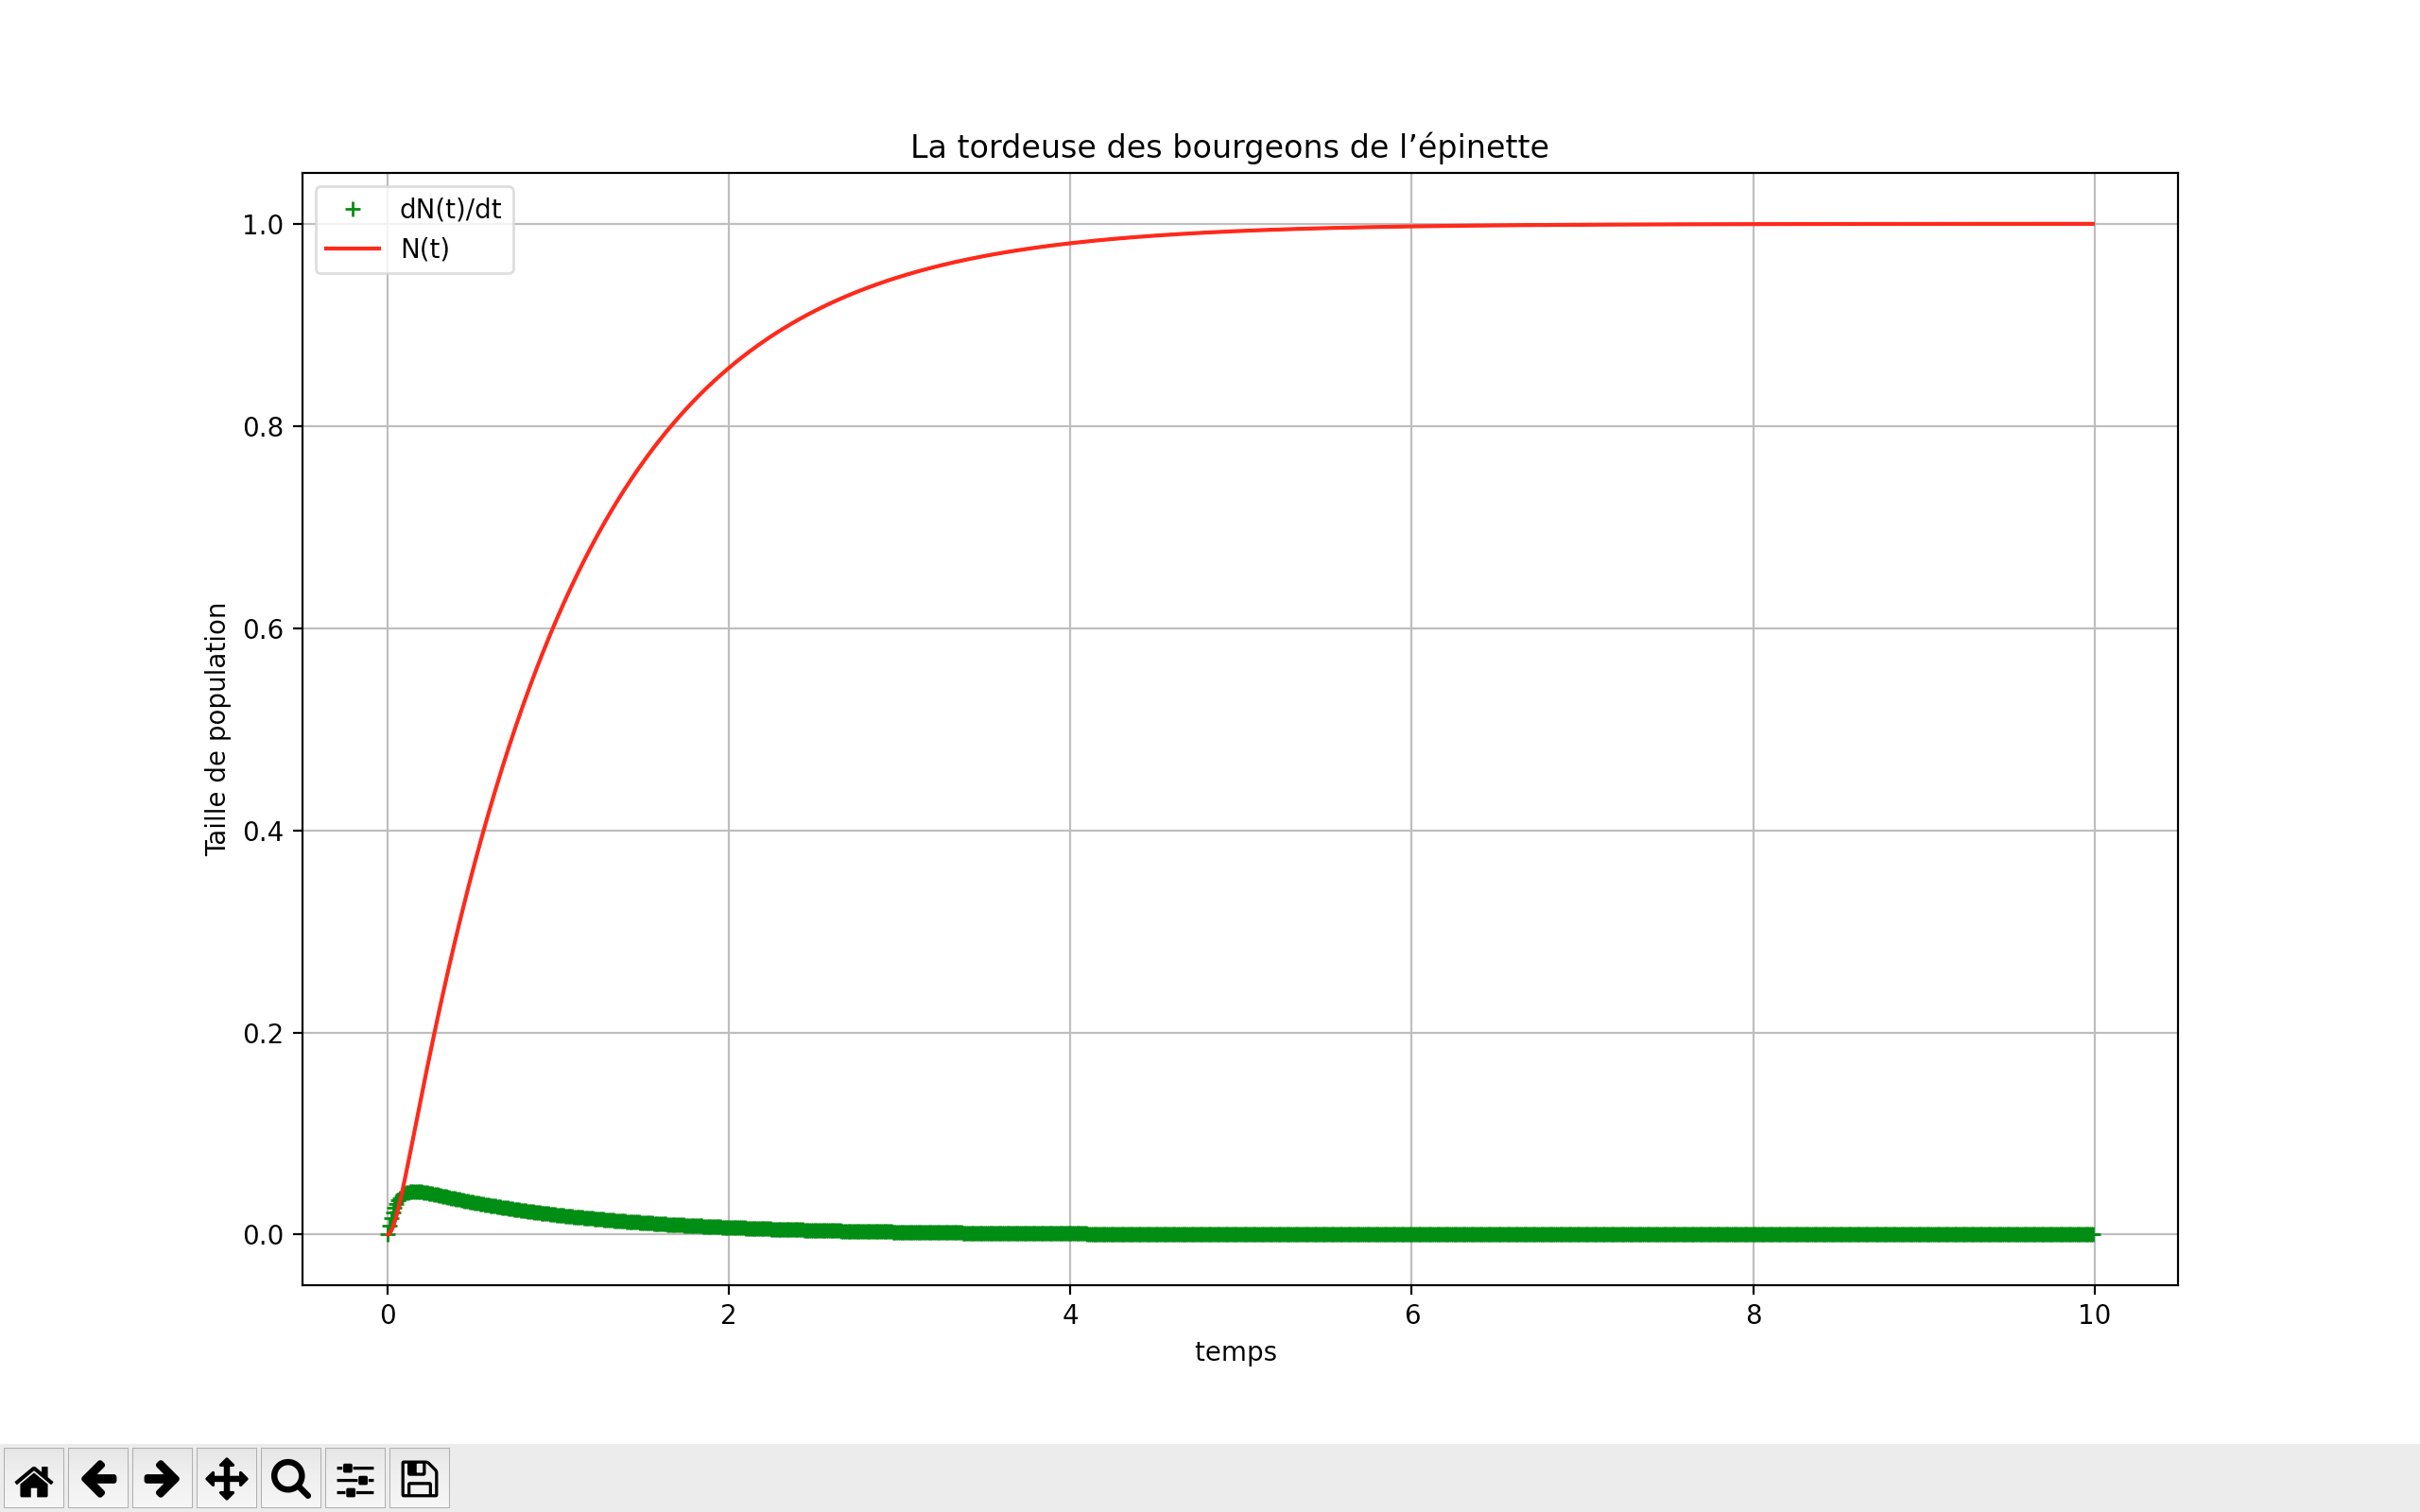
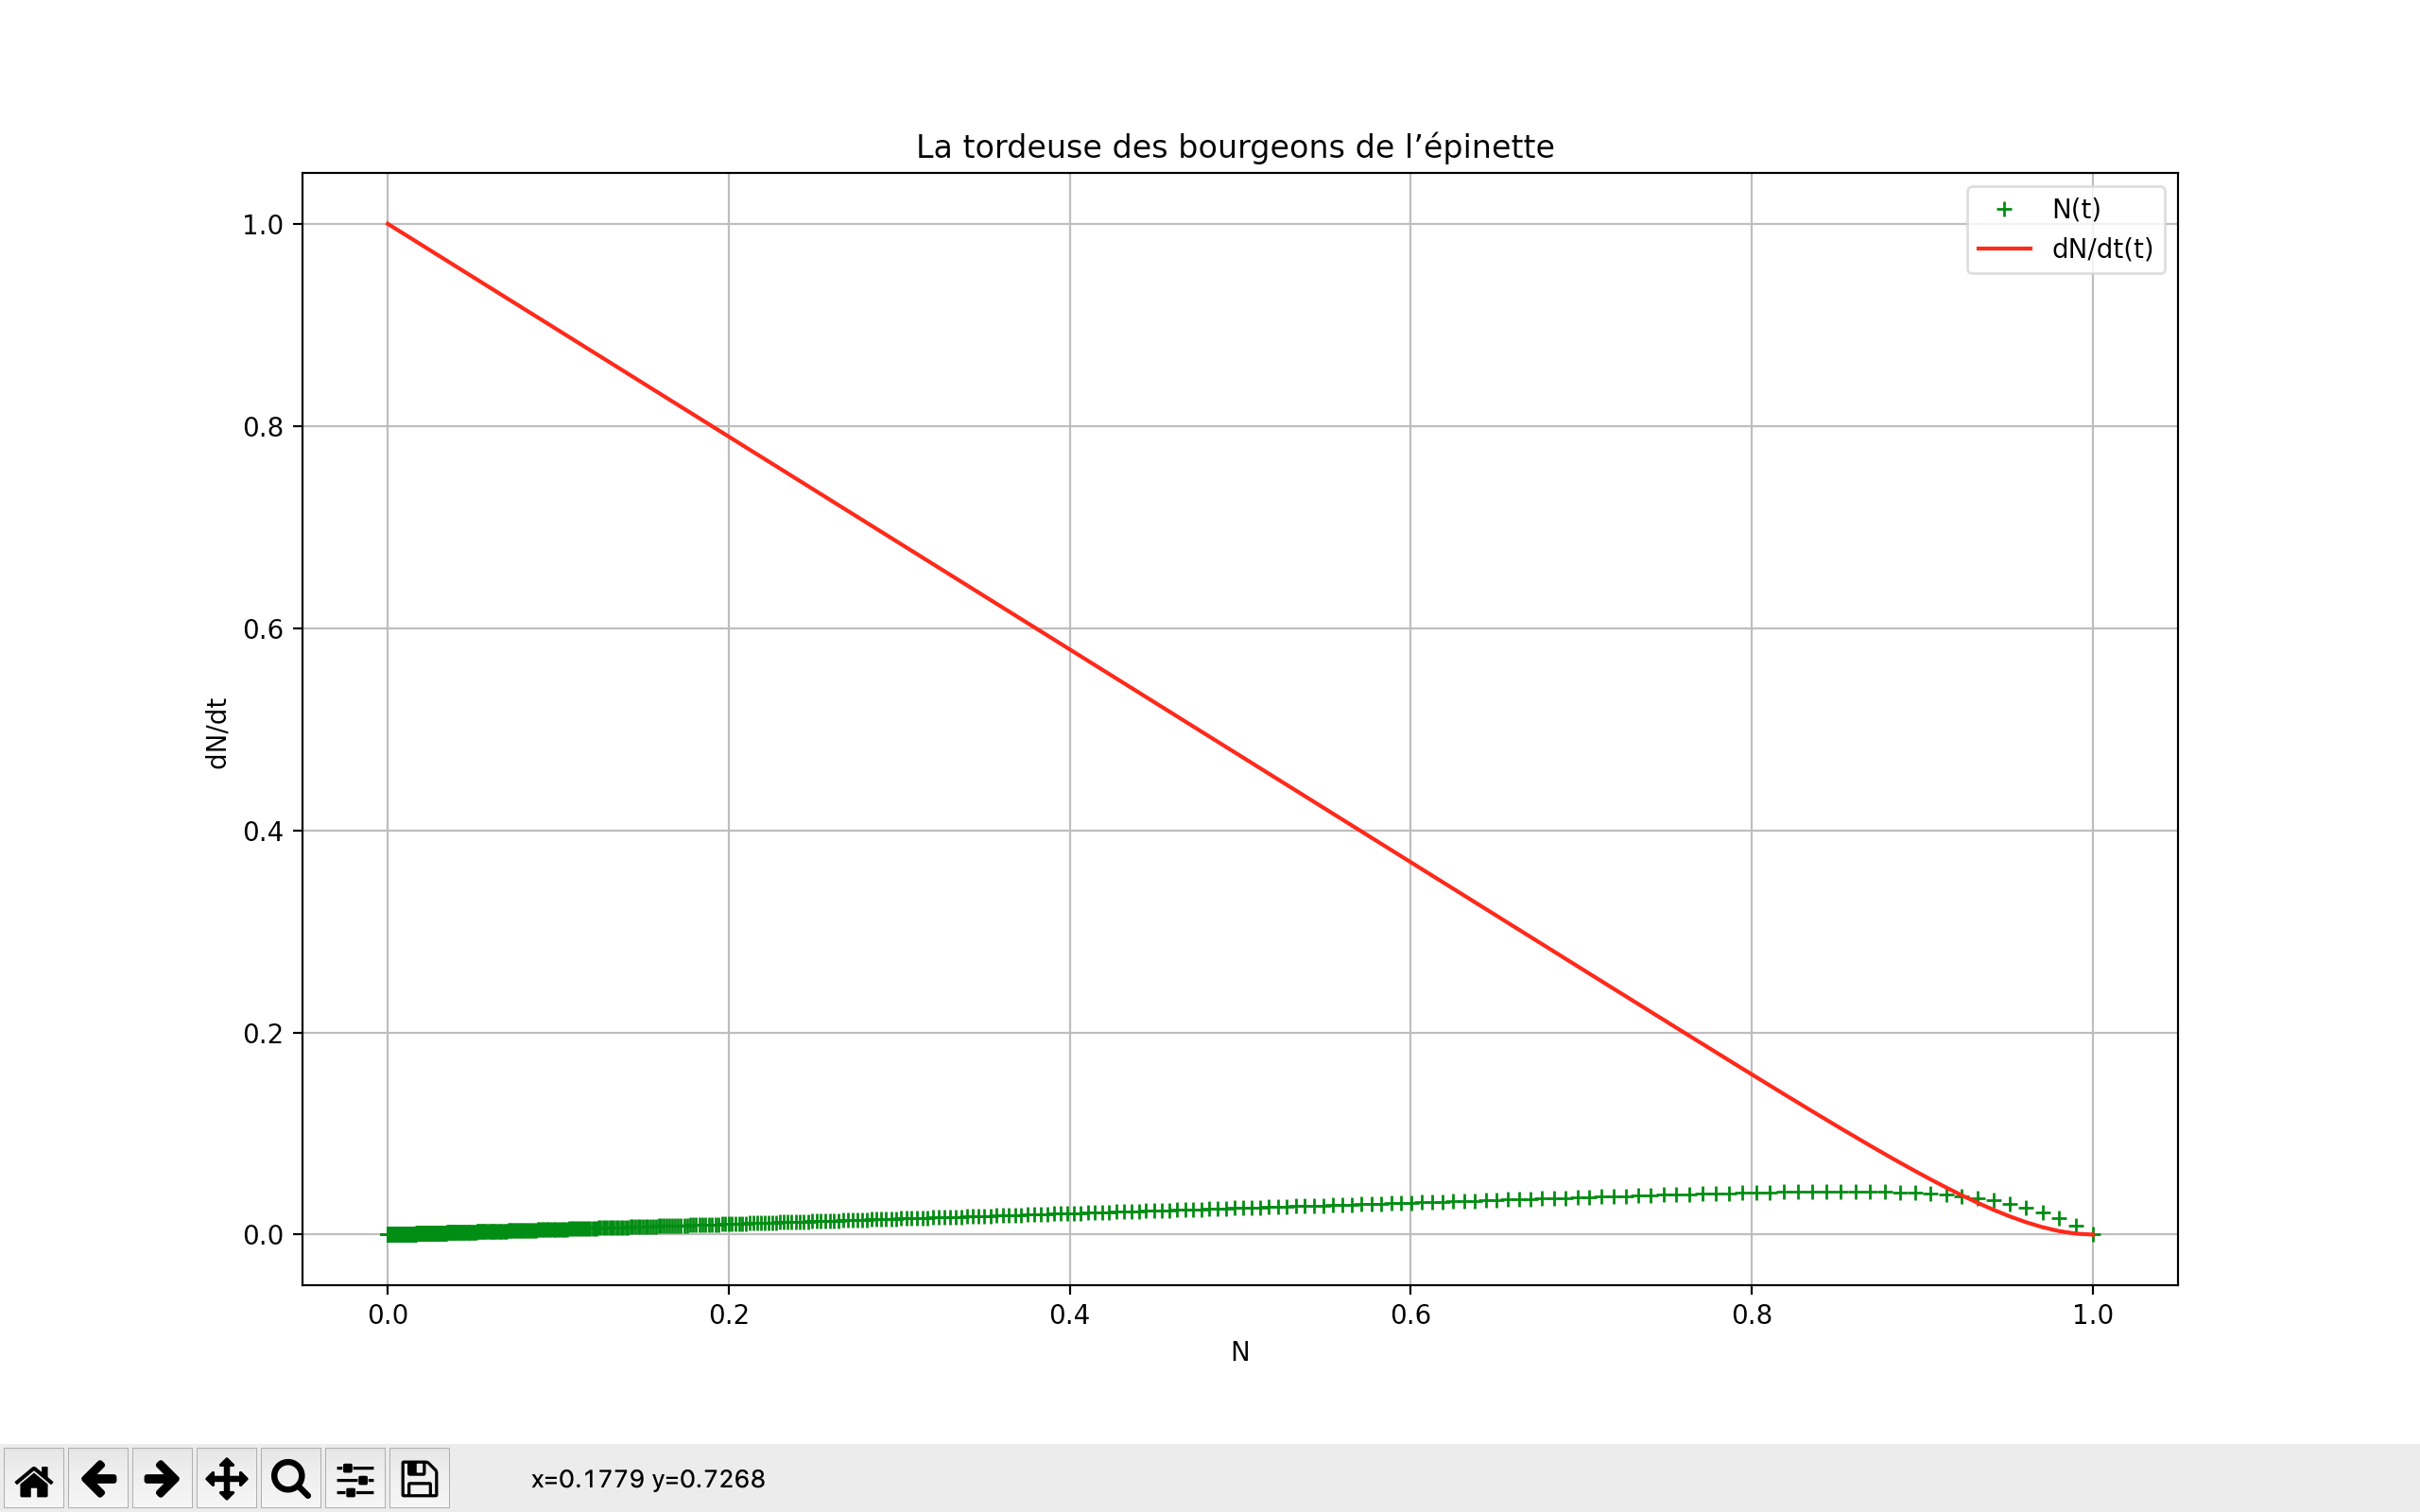
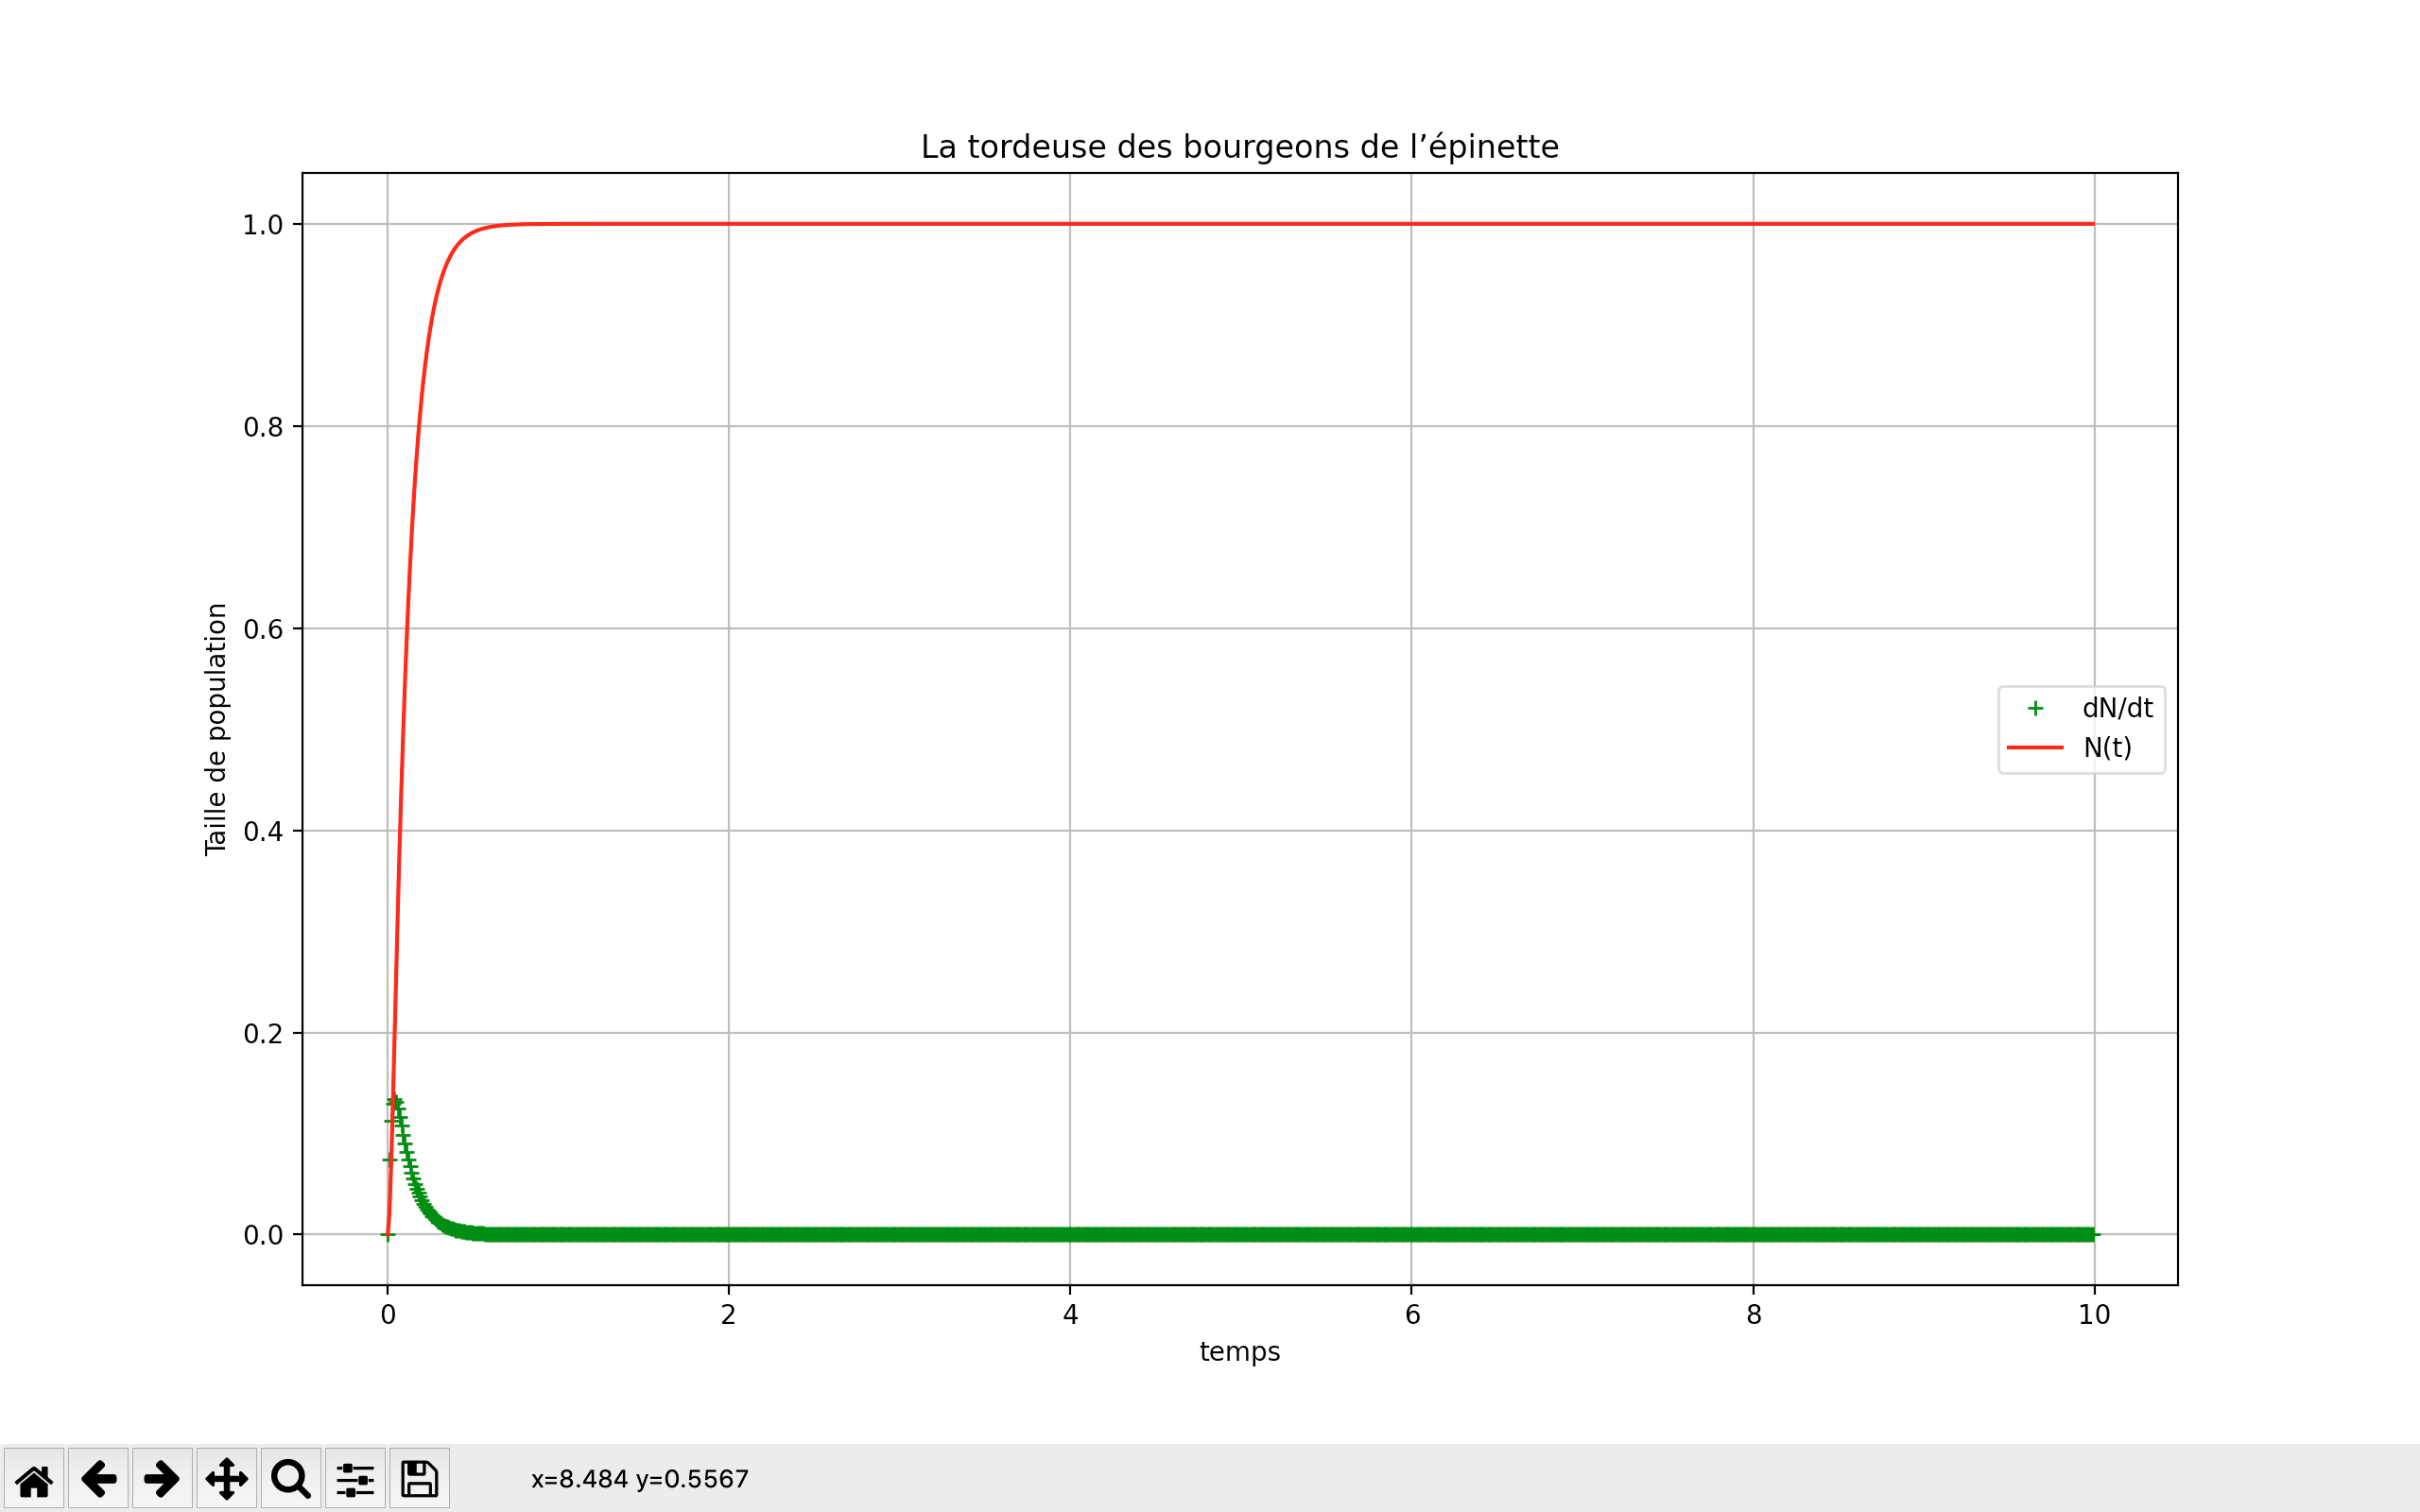

* Conclusion :

J'ai utilisé deux méthodes la première avec lequelle j'ai obtenu les3 derniers graphes (méthodes RK TableauxVaribles en cours) et la deuxième j'ai utilisé la méthode de l'OH et j'ai calculé la solution avec la bibliothèque odeint et un logiciel des équations differentielles non lineires pour obtenir la solution exacte

D'après les résultats, on réalise que la méthode de runhe kutta 4 est plus précise mais au niveau compléxité c'est pas optimal car ca demande beaucoup plus de calcul que les méthodes de Heun et Euler 
La solution avec Euler est moins précis que RungeKutta(Lors du graphe je compare juste deux méthodes à la fois ) donc a chaque qu'on utilise RungeKutta le cout du calcul est grand mais la précision est aussi importante c'est la raison par exemple que si NASA effectue une modélisation ca serait plus interessant d'utiliser la méthode de Runge -kutta que celle d'Euler ou Heun en plus ils ont des superordinateurs qui sont capables d'effectuer un nombre de calcul très grand

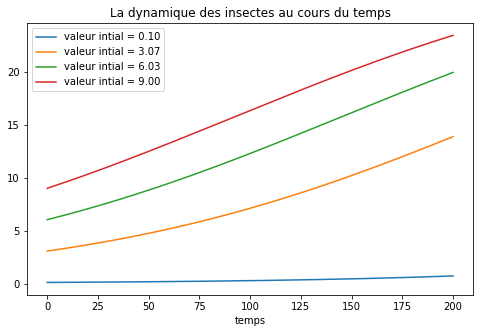

In [3]:
# Dessiner la dynamique temporel
import numpy as np
import matplotlib.pyplot as plt


dt = 0.1


P = 10 
r = 0.1
beta = 20
#N=20
landa=0.01
S=15
Nc=landa*S
kp=4
K=kp*S
#dNdt=r*N*(1-N/K)-(beta*P*N**2/(N**2+Nc**2))

landa=0.1
S=2500
kp=4
Nc=landa*S
K=kp*S

#r = 0.53   # taux de croissance
#K = 10.    # capacité de transport

#plot

#Pour obtenir les 3 résulatats il suffit de changer S
fig = plt.figure(figsize=(8,5))
plt.subplot(1,1,1)

for j in np.linspace(0.1, 9, 4):
    N = [j]
    #Calcul
    for i in range(200):
        N.append( N[i]+(r * N[i] * (1 - N[i]/K) - (beta*P * N[i]**2)/(Nc**2 + N[i]**2))*dt )
        
    plt.plot(N, label = 'valeur intial = %0.2f' %j)

plt.title("La dynamique des insectes au cours du temps")
plt.xlabel("temps")
plt.legend(loc = 'best')

Analyse du model:

Premiere étape: trouver une formule sans dimension:

Le model à 4 parametres , dont  Nc et   K  qui ont la meme dimension que   N , la  population des insectes. Donc   N/Nc  ou   N/K  peut servir comme un niveau sans dimension de la population .



(1) $ \dot{N} =r*N*(1-N/K)-(beta*P*N^2/(N^2+Nc^2))$


On divise  (1) par  beta*P  et on obtient   x=N/Nc  qui donne :


(2) $ (Nc/beta*P)*\dot{x}=(r/(beta*P))*Nc*x(1−(Nc*x)/K)−x^2/(1+x^2) $

On introduit la constante du temps  τ  et les constantes sans dimension  r  et  k  comme

$ τ=beta*P*t/Nc $      
$  r_1=r*Nc/beta*P    $ 

$  k_1=K/Nc  $

ainsi (2) devient :

(3) $ \dot{x} =r_1*x(1−x/k_1)−x^2/(1+x^2) $

Trouvons les points fixes :
Dans la croissance logistique en general, un point fixe trivial est   xequ=0 . Si la predation très faible , la population d’insectes va croitre en taille par rapport à sa valeur initial 

Les autres points fixes sont trouvés à partir des solutions de :


$ r_1*x(1−x/k_1)=x^2/(1+x^2) $

quand divise par x 

(4) $ r_1*(1−x/k_1)=x/1+x^2  $


Cette équation peut etre résolu en dessinant les deux cotes de cette équation dans un plot



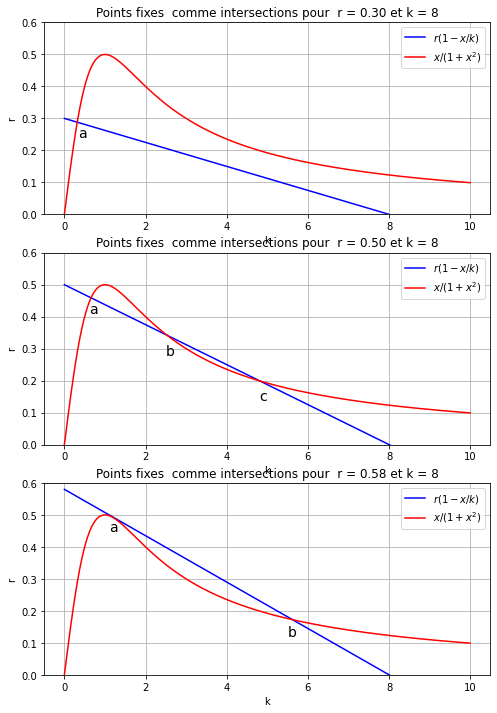

In [47]:
import numpy as np
import matplotlib.pyplot as plt


#definir les proprietés de la  figure properties pour les  plots:
fig = plt.figure(figsize=(8,12))


X = np.linspace(0,10,1000)

R = [0.3, 0.5, 0.58]

for n, r in enumerate(R):
    y1 = []
    y2 = []
    fp = []
    k = 8.
    
    for x in X:
        y1.append(r*(1-float(x)/k))
        y2.append(x/(1+float(x)**2))

    plt.subplot(3, 1, n + 1)
    plt.plot(X, y1, 'b-', label='$r(1-x/k)$')
    plt.plot(X, y2, 'r-', label = '$x/(1+x^2)$')
    if n == 0:
        plt.text(0.33, 0.24, 'a', fontsize=14)
    if n == 1:
        plt.text(0.61, 0.41, 'a', fontsize=14)
        plt.text(2.5, 0.28, 'b', fontsize=14)
        plt.text(4.8, 0.14, 'c', fontsize=14)
    if n == 2:
        plt.text(1.1, 0.45, 'a', fontsize=14)
        plt.text(5.5, 0.12, 'b', fontsize=14)

    plt.ylim(0, 0.6)
    plt.xlabel('k')
    plt.ylabel('r')
    plt.title('Points fixes  comme intersections pour  r = %0.2f et k = %0.f' %(r, k))
    plt.grid()
    plt.legend(loc='best')

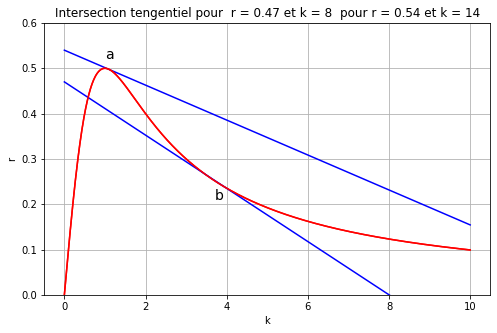

In [46]:
fig = plt.figure(figsize=(8,5))
X = np.linspace(0,10,1000)

RK = ((0.54, 14.), (0.47, 8.))

for (r, k) in RK:
    y1 = []
    y2 = []
    for x in X:
        y1.append(r*(1-float(x)/k))
        y2.append(x/(1+float(x)**2))

    plt.plot(X, y1, 'b-')
    plt.plot(X, y2, 'r-')
plt.text(1., 0.52, 'a', fontsize=14)
plt.text(3.7, 0.21, 'b', fontsize=14)
plt.ylim(0, 0.6)
plt.xlabel('k')
plt.ylabel('r')
plt.title('Intersection tengentiel pour  r = 0.47 et k = 8  pour r = 0.54 et k = 14')
plt.grid()

In [ ]:
#definir les proprietés de la  figure properties pour les  plots:
fig = plt.figure(figsize=(12,4))

X = np.linspace(-2.38,2.5,1000)
y = []

for n,x in enumerate(X):
    # quelque soit la courbe qui intersecte avec la ligne nulle
    y.append(2-(2 - x**2)**2 / (1 + x**2))

plt.text(-0.65, -0.4, 'a', fontsize=14)
plt.text(0.63, -0.4, 'b', fontsize=14)
plt.text(2.33, -0.4, 'c', fontsize=14)
plt.plot(-2.38, 0 ,color = 'w',marker='o', markersize = 10.0)
plt.plot(-0.6, 0 ,color = 'k',marker='o', markersize = 10.0)
plt.plot(0.6,0,color = 'w',marker='o', markersize = 10.0)
plt.plot(2.38, 0 ,color = 'k',marker='o', markersize = 10.0)
plt.annotate('', xy=(-0.8, 0), xytext=(-2.2, 0),arrowprops=dict(facecolor='k',lw=0),)
plt.annotate('', xy=(-0.4, 0), xytext=(0.4, 0),arrowprops=dict(facecolor='k',lw=0),)
plt.annotate('', xy=(2.2, 0), xytext=(0.8, 0),arrowprops=dict(facecolor='k',lw=0),)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks()
plt.plot(X, y, 'r-')
plt.plot(X, [0]*len(X), 'b-')

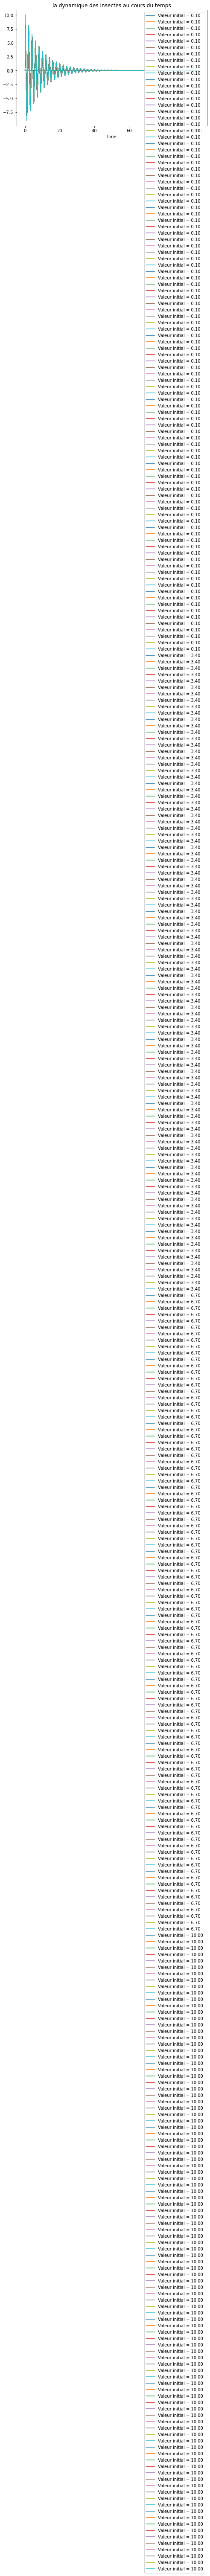

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,fabs,sin,cos,sqrt

P = 10 
r = 0,1
beta = 20
#N=20
landa=0.5
S=1000
Nc=landa*S
kp=4
K=kp*S
#dNdt=r*N*(1-N/K)-(beta*P*N**2/(N**2+Nc**2))

dt = 0.1
rau=0.1
epsilon=1
Smax=1500


#plot
fig = plt.figure(figsize=(8,5))
plt.subplot(1,1,1)

for j in np.linspace(0.1, 10, 4):
    N = [j]
    #calcul
    for i in range(100):
        N.append( (rau * N[i] * (1 - N[i]/Smax) - (epsilon * N[i]) ))
        plt.plot(N, label = 'Valeur initial = %0.2f' %j)

plt.title("la dynamique des insectes au cours du temps")
plt.xlabel("time")
plt.legend(loc = 'best')
plt.show()

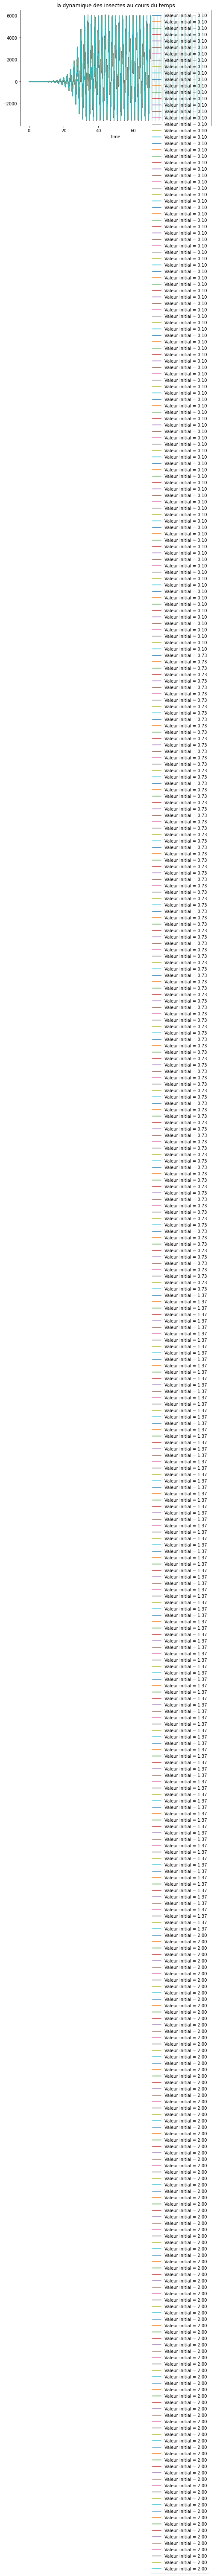

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,fabs,sin,cos,sqrt

P = 10 
r = 0,1
beta = 20
#N=20
landa=0.5
S=1000
Nc=landa*S
kp=4
K=kp*S
#dNdt=r*N*(1-N/K)-(beta*P*N**2/(N**2+Nc**2))

dt = 0.1
rau=-0.3
epsilon=1
Smax=2500


#plot
fig = plt.figure(figsize=(8,5))
plt.subplot(1,1,1)

for j in np.linspace(0.1, 2, 4):
    N = [j]
    #calcul
    for i in range(100):
        N.append( (rau * N[i] * (1 - N[i]/Smax) - (epsilon * N[i]) ))
        plt.plot(N, label = 'Valeur initial = %0.2f' %j)

plt.title("la dynamique des insectes au cours du temps")
plt.xlabel("time")
plt.legend(loc = 'best')
plt.show()

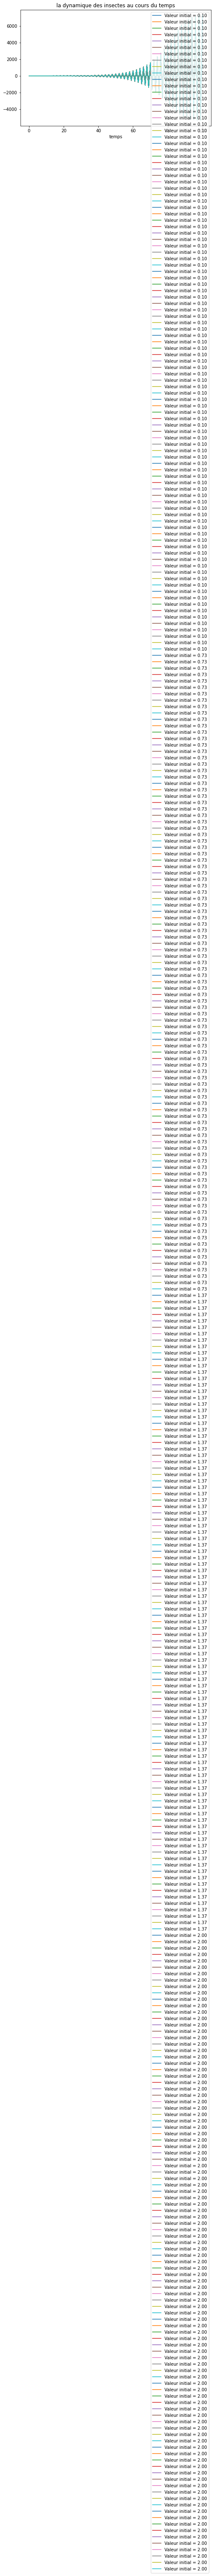

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,fabs,sin,cos,sqrt

P = 10 
r = 0,1
beta = 20
#N=20
landa=0.5
S=2000
Nc=landa*S
kp=4
K=kp*S
#dNdt=r*N*(1-N/K)-(beta*P*N**2/(N**2+Nc**2))

dt = 0.1
rau=-0.1
epsilon=1
Smax=2000


#plot
fig = plt.figure(figsize=(8,5))
plt.subplot(1,1,1)

for j in np.linspace(0.1, 2, 4):
    N = [j]
    #calcul
    for i in range(100):
        N.append( (rau * N[i] * (1 - N[i]/Smax) - (epsilon * N[i]) ))
        plt.plot(N, label = 'Valeur initial = %0.2f' %j)

plt.title("la dynamique des insectes au cours du temps")
plt.xlabel("temps")
plt.legend(loc = 'best')
plt.show()

In [ ]:
On remarque donc pour des valeurs de rau et epsilon on obtient des oscillations ,en particulier rau=0.1,-0.1,0 
 pour epsilon =1  avec S=1500,2000,2500 

*Le comportement de la population de tordeuse des bourgeons de l'épinette peut être considéré comme celui d'un système lent-rapide. L'augmentation lente du taux de croissance de la population pousse le système vers un point de basculement, auquel une transition critique a lieu. La taille de la population "explose", une épidémie se produit.

Text(0.5, 1.0, 'épidémie insectes')

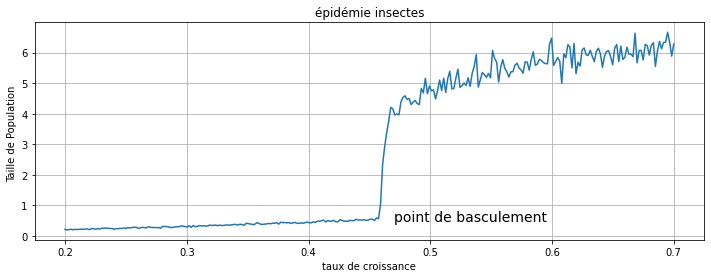

In [49]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#parameters
R = np.linspace(0.2, 0.7, 300)
p = 2    # l'exposant 
K = 8.   # capacite de transport

# un petit bruit est ajouté pour rendre le systeme plus réaliste
# determinons la puissance de bruit
sigma = 0.05

# definir le systeme dans une fonction
def Sys(X, t=0):
    return np.array([r * X[0] * (1 - X[0]/K) - (X[0]**p / (1 + X[0]**p))])

# generate l'xe x des abcisses
t = np.linspace(0, 100,  1000)
# valeur initial
Sys0 = np.array([10])

# preparer les les plots
fig = plt.figure(figsize=(12,4))
plt.subplot(1,1,1)

XX = []

# faire une boucle sur r
for r in R:
    # integrer le systeme
    X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
    #generer le bruit, sigma * x * dW
    noise = sigma * np.random.normal(0, 1, 1000)
    # transformer  x and y, et ajouter du bruit
    x = X.T + noise*X.T
    # plot
    XX.append(x[0][-1])
    #plt.plot(x[0], label = 'a = %0.1f' % a)
    # incrementer r


plt.plot(R, XX)
plt.grid()
plt.text(0.47, 0.5, 'point de basculement', fontsize=14)
plt.xlabel('taux de croissance')
plt.ylabel('Taille de Population ')
plt.title('épidémie insectes')